In [1]:
import pandas as pd

# Load the Excel file
file_path = "All Data.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the file
print(data.head())

          DisNo. Historic Classification Key Disaster Group Disaster Subgroup  \
0  1900-0003-USA      Yes    nat-met-sto-tro        Natural    Meteorological   
1  1900-0006-JAM      Yes    nat-hyd-flo-flo        Natural      Hydrological   
2  1900-0007-JAM      Yes    nat-bio-epi-vir        Natural        Biological   
3  1900-0008-JPN      Yes    nat-geo-vol-ash        Natural       Geophysical   
4  1900-0009-TUR      Yes    nat-geo-ear-gro        Natural       Geophysical   

       Disaster Type  Disaster Subtype External IDs       Event Name  ISO  \
0              Storm  Tropical cyclone          NaN              NaN  USA   
1              Flood   Flood (General)          NaN              NaN  JAM   
2           Epidemic     Viral disease          NaN  Gastroenteritis  JAM   
3  Volcanic activity          Ash fall          NaN              NaN  JPN   
4         Earthquake   Ground movement          NaN              NaN  TUR   

   ... Reconstruction Costs ('000 US$)  \
0  ...  

In [2]:
# Create a new DataFrame by removing rows with NaN in specific columns
columns_to_check = ["Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)"]
cleaned_data = data.dropna(subset=columns_to_check)

print("New DataFrame with rows containing NaN in specified columns removed:")
print(cleaned_data)

# Verify the changes
print(f"Original DataFrame shape: {data.shape}")
print(f"Cleaned DataFrame shape: {cleaned_data.shape}")

New DataFrame with rows containing NaN in specified columns removed:
              DisNo. Historic Classification Key Disaster Group  \
0      1900-0003-USA      Yes    nat-met-sto-tro        Natural   
16     1902-0012-GTM      Yes    nat-geo-ear-gro        Natural   
19     1903-0002-USA      Yes    nat-hyd-flo-flo        Natural   
36     1905-0003-IND      Yes    nat-geo-ear-gro        Natural   
40     1905-0008-ALB      Yes    nat-geo-ear-gro        Natural   
...              ...      ...                ...            ...   
16910  2023-0843-USA       No    nat-met-sto-sev        Natural   
16929  2023-9234-ESP       No    nat-cli-dro-dro        Natural   
16934  2023-9651-BRA       No    nat-cli-dro-dro        Natural   
16936  2023-9868-USA       No    nat-cli-dro-dro        Natural   
16937  2023-9872-CHN       No    nat-cli-dro-dro        Natural   

      Disaster Subgroup Disaster Type  Disaster Subtype External IDs  \
0        Meteorological         Storm  Tropical cyclon

In [3]:
# List of columns to keep
columns_to_keep = [
    'DisNo.', 'Historic', 'Classification Key', 'Disaster Group', 
    'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',  
    'ISO', 'Country', "Reconstruction Costs ('000 US$)", 
    "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", 
    "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", 
    "Total Damage, Adjusted ('000 US$)"
]

# Create a new DataFrame with only the specified columns
filtered_data = data[columns_to_keep]

# Display the new DataFrame
print(filtered_data)

              DisNo. Historic Classification Key Disaster Group  \
0      1900-0003-USA      Yes    nat-met-sto-tro        Natural   
1      1900-0006-JAM      Yes    nat-hyd-flo-flo        Natural   
2      1900-0007-JAM      Yes    nat-bio-epi-vir        Natural   
3      1900-0008-JPN      Yes    nat-geo-vol-ash        Natural   
4      1900-0009-TUR      Yes    nat-geo-ear-gro        Natural   
...              ...      ...                ...            ...   
17289  2024-9197-ZWE       No    nat-cli-dro-dro        Natural   
17290  2024-9277-VNM       No    nat-cli-dro-dro        Natural   
17291  2024-9338-NAM       No    nat-cli-dro-dro        Natural   
17292  2024-9381-GRD       No    nat-cli-dro-dro        Natural   
17293  2024-9592-AGO       No    nat-cli-dro-dro        Natural   

      Disaster Subgroup      Disaster Type  Disaster Subtype  ISO  \
0        Meteorological              Storm  Tropical cyclone  USA   
1          Hydrological              Flood   Flood (Gener

## Type of Costs

C:\Users\milan\AppData\Local\Temp\ipykernel_14608\1326938289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = filtered_data.iloc[:, 0].astype(str).str[:4].astype(int)


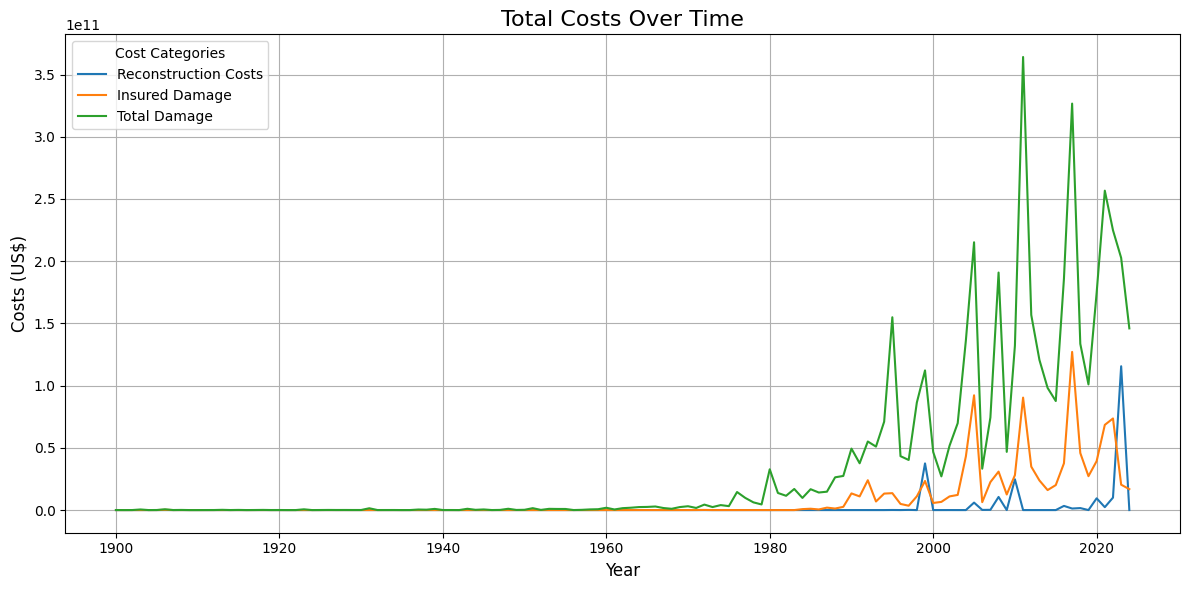

In [ ]:
import matplotlib.pyplot as plt

# Ensure the Year column is extracted from the first column
filtered_data['Year'] = filtered_data.iloc[:, 0].astype(str).str[:4].astype(int)

# Adjusted column names for better readability
cost_columns = ['Reconstruction Costs', 'Insured Damage', 'Total Damage']

# Modify column names to match the data format in the dataset
full_cost_columns = [f"{col} ('000 US$)" for col in cost_columns]
total_costs_per_year = filtered_data.groupby('Year')[full_cost_columns].sum() * 1000
total_costs_per_year.columns = cost_columns

# Plot the total costs over time
total_costs_per_year.plot(kind='line', figsize=(12, 6))
plt.title('Total Costs Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Costs (US$)', fontsize=12)  
plt.legend(title='Cost Categories', loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

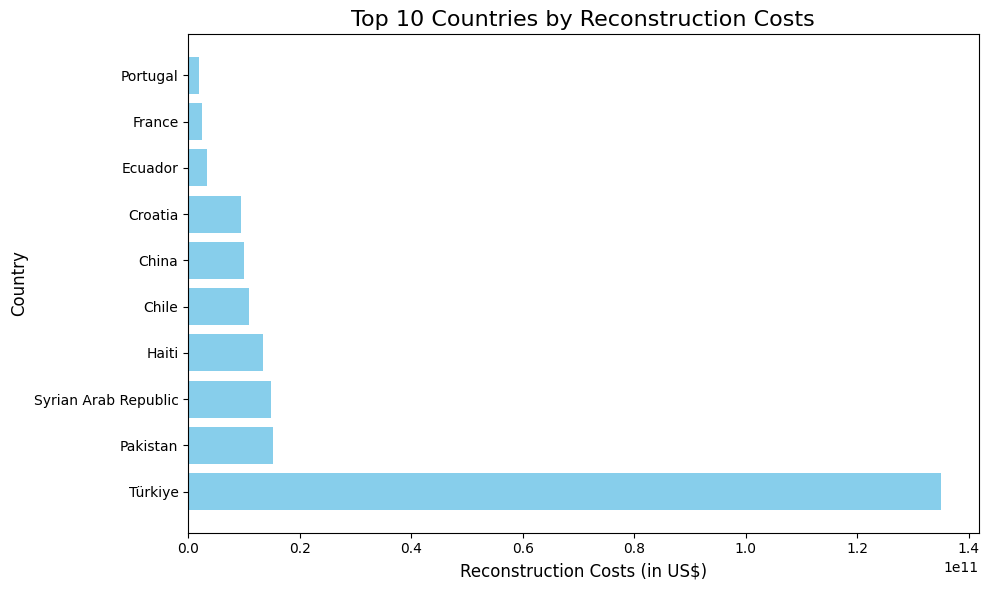

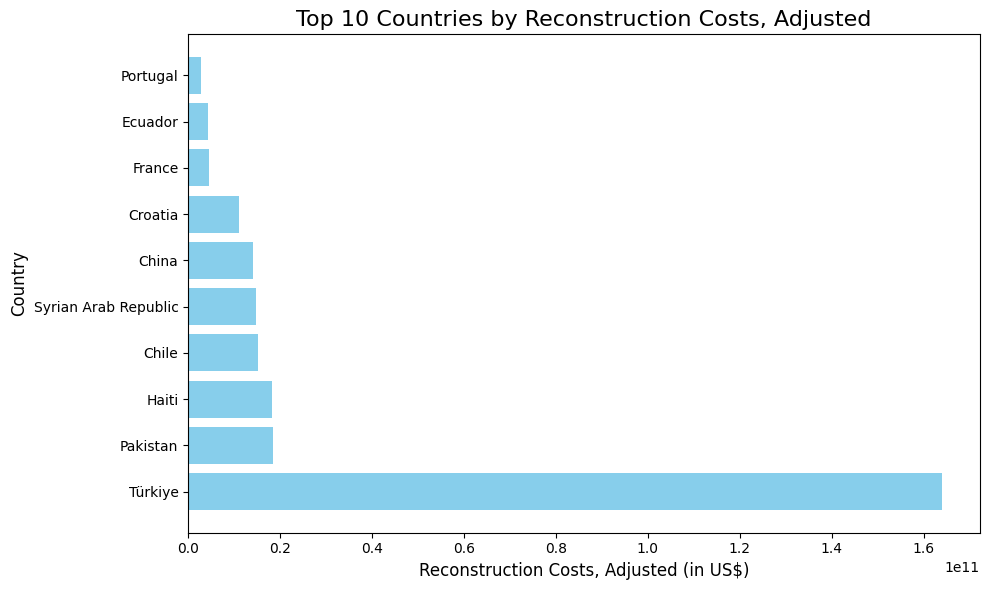

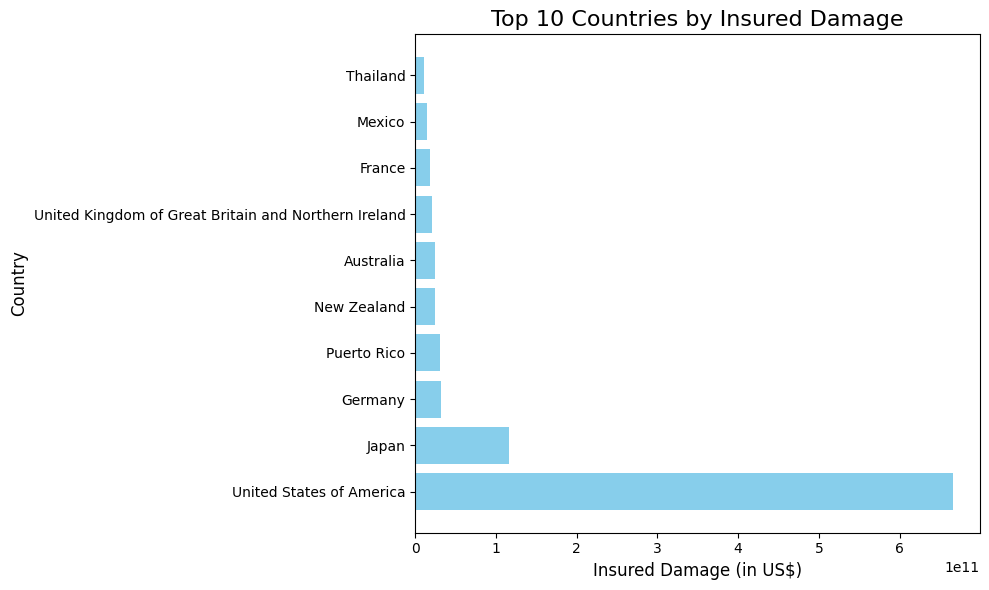

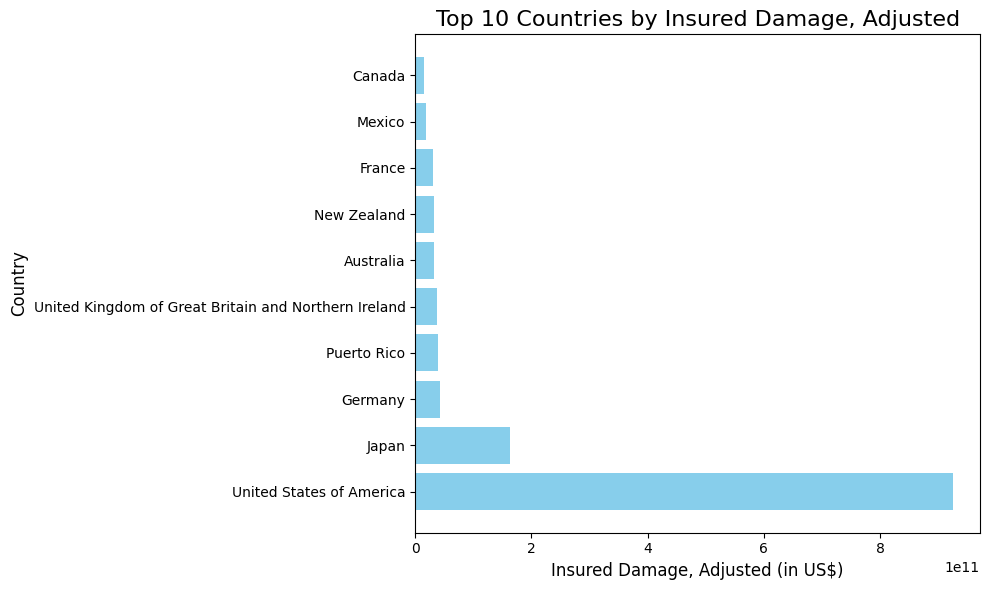

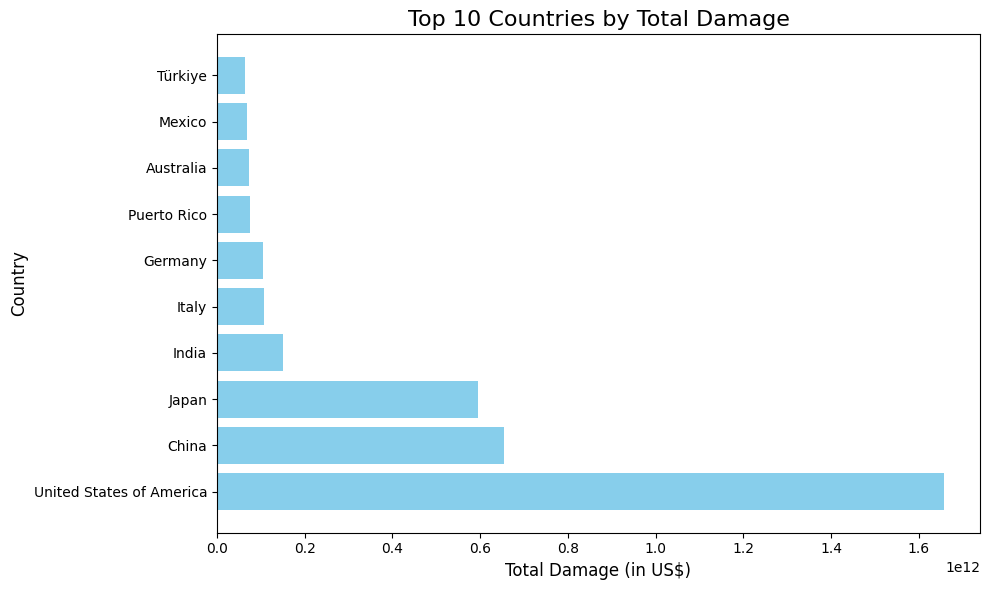

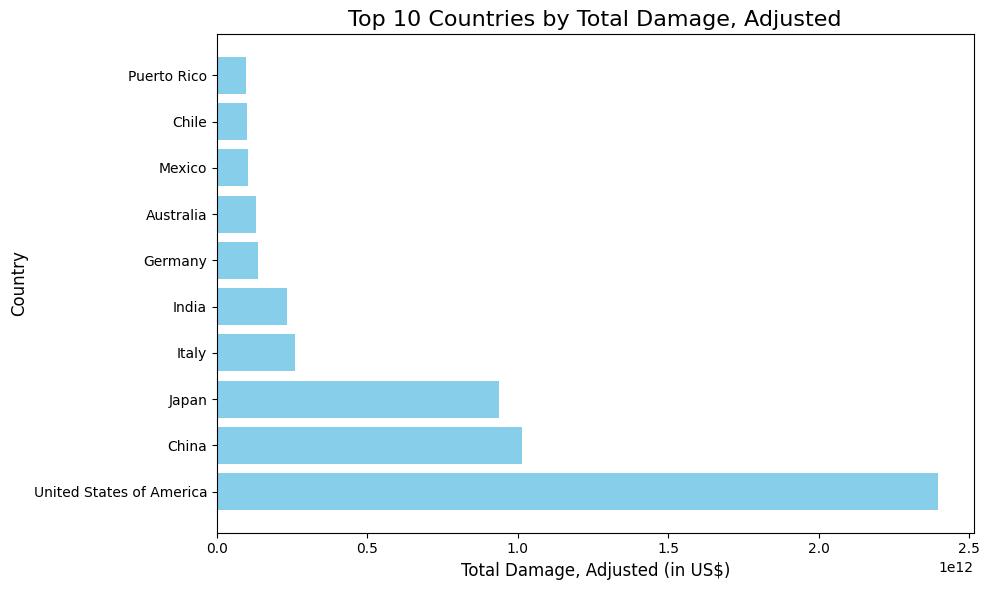

In [ ]:

cost_columns = [
    "Reconstruction Costs",
    "Reconstruction Costs, Adjusted",
    "Insured Damage",
    "Insured Damage, Adjusted",
    "Total Damage",
    "Total Damage, Adjusted"
]

# Loop through each cost column and plot the top 10 countries
for i, cost_column in enumerate(cost_columns):
    # Adjust column name to match the data
    full_cost_column = f"{cost_column} ('000 US$)"
    country_costs = filtered_data.groupby('Country')[full_cost_column].sum().reset_index()
    country_costs[full_cost_column] *= 1000
    top_10_countries = country_costs.sort_values(by=full_cost_column, ascending=False).head(10)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_countries['Country'], top_10_countries[full_cost_column], color='skyblue')
    plt.title(f'Top 10 Countries by {cost_column}', fontsize=16)
    plt.xlabel(f'{cost_column} (in US$)', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.tight_layout()
    plt.show()


In [6]:
# Select the cost columns of interest
cost_columns = [
    "Reconstruction Costs ('000 US$)",
    "Reconstruction Costs, Adjusted ('000 US$)",
    "Insured Damage ('000 US$)",
    "Insured Damage, Adjusted ('000 US$)",
    "Total Damage ('000 US$)",
    "Total Damage, Adjusted ('000 US$)"
]

# Group by Disaster Type and sum the cost columns
costs_per_disaster_type = filtered_data.groupby('Disaster Type')[cost_columns].sum().reset_index()

# Display the result
print(costs_per_disaster_type)

                  Disaster Type  Reconstruction Costs ('000 US$)  \
0               Animal incident                              0.0   
1                       Drought                              0.0   
2                    Earthquake                      203716363.0   
3                      Epidemic                              0.0   
4           Extreme temperature                              0.0   
5                         Flood                       13765993.0   
6                           Fog                              0.0   
7   Glacial lake outburst flood                              0.0   
8                        Impact                              0.0   
9                   Infestation                              0.0   
10          Mass movement (dry)                              0.0   
11          Mass movement (wet)                           3000.0   
12                        Storm                        4779900.0   
13            Volcanic activity                 

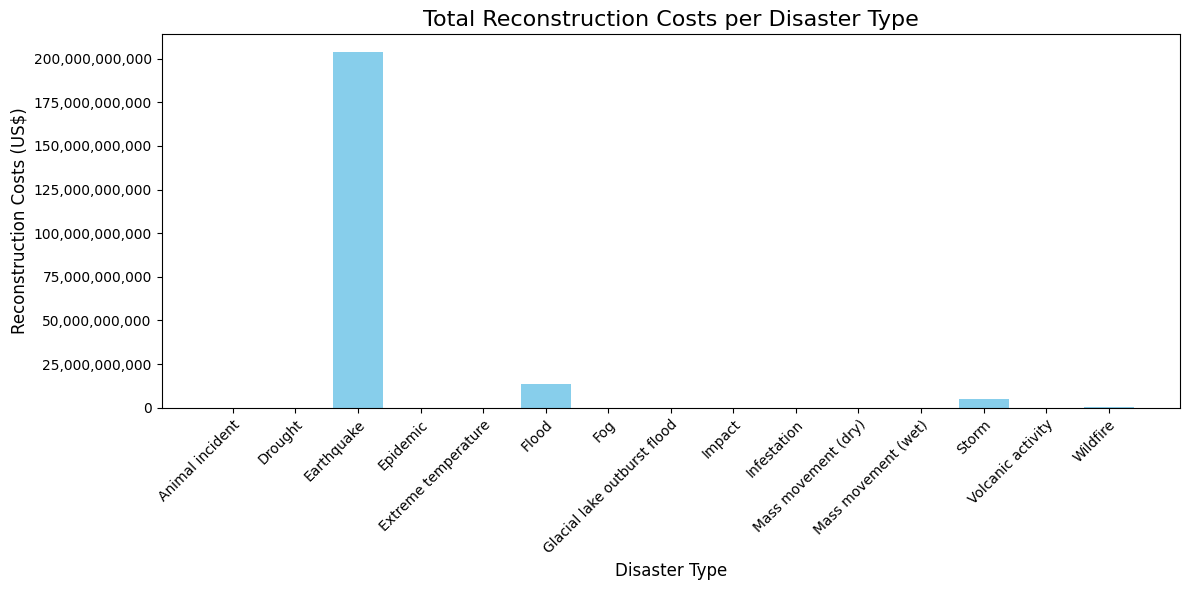

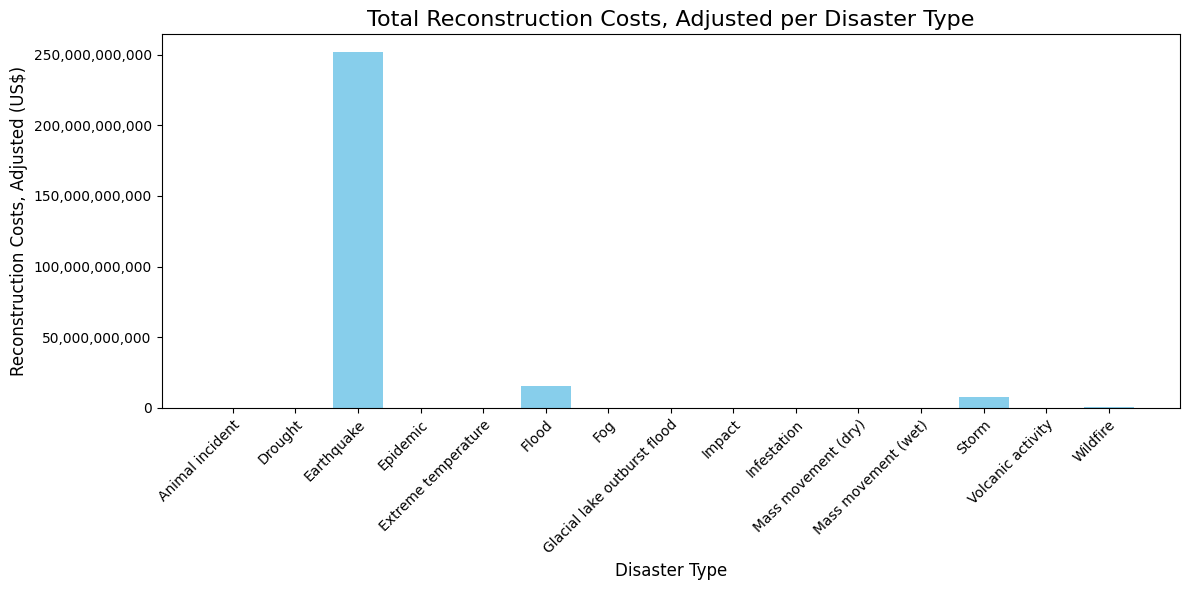

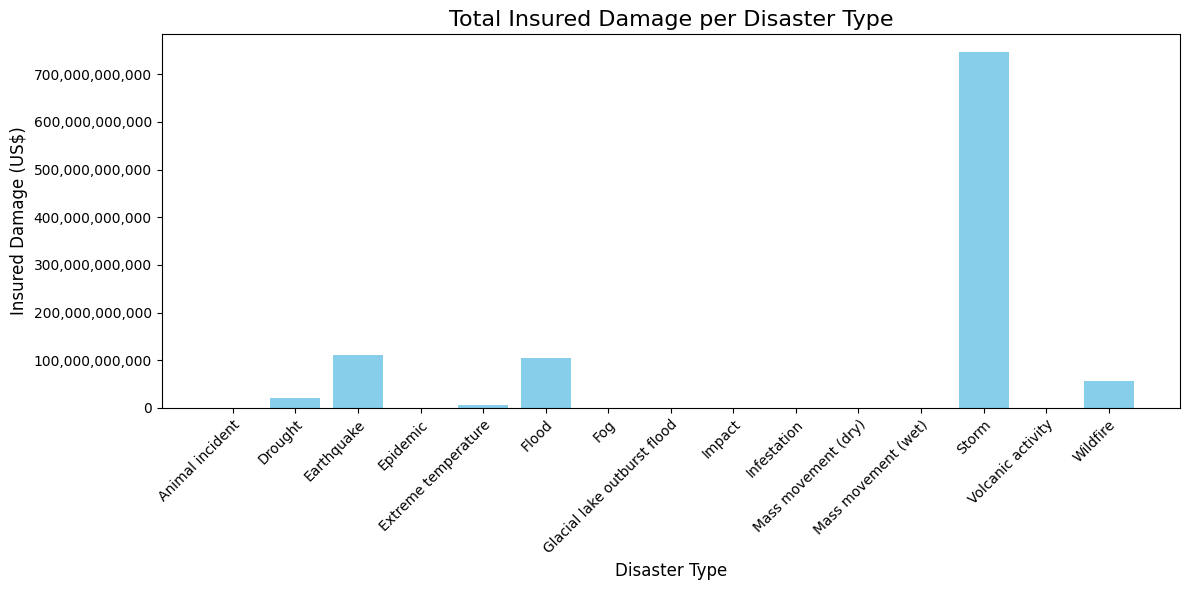

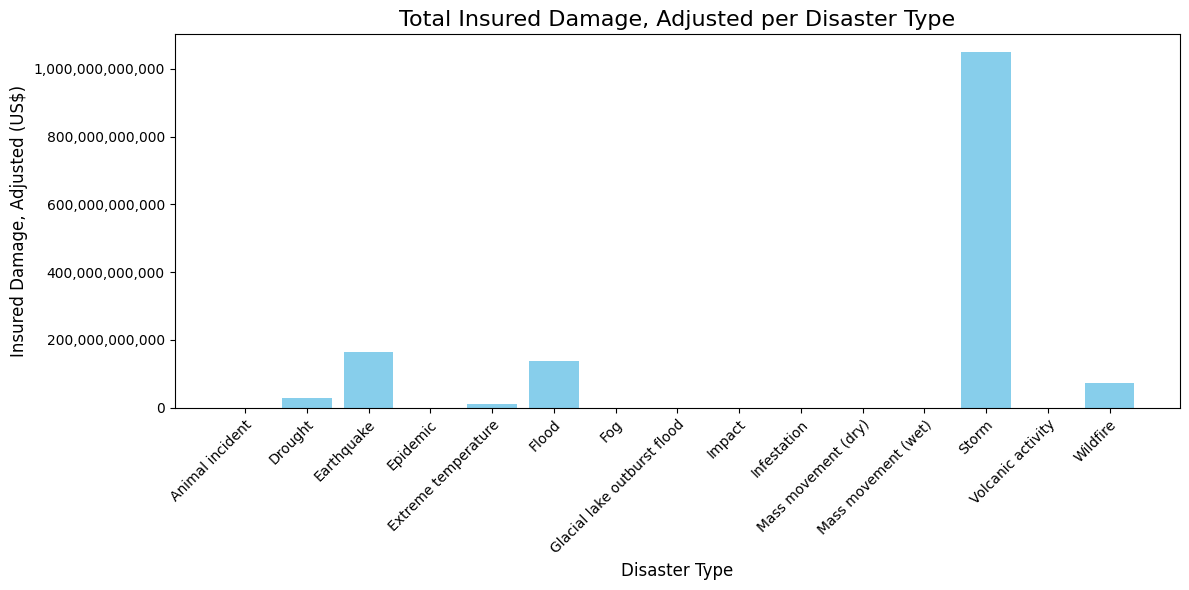

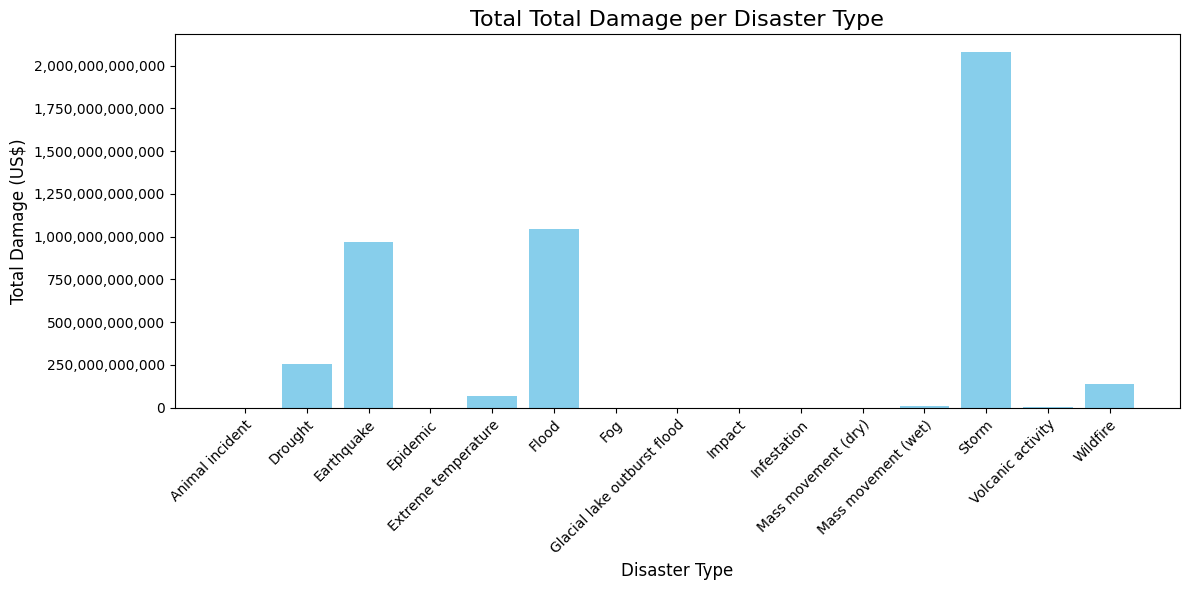

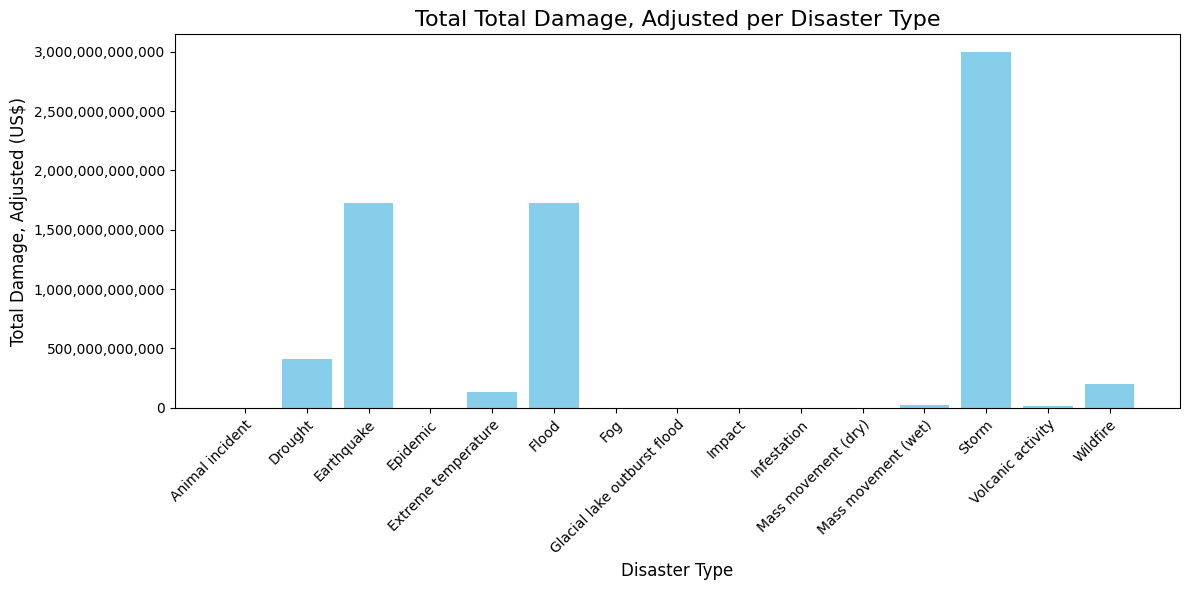

: 

In [ ]:
import matplotlib.ticker as ticker

# Adjusted column names for better readability
cost_columns = [
    'Reconstruction Costs',
    'Reconstruction Costs, Adjusted',
    'Insured Damage',
    'Insured Damage, Adjusted',
    'Total Damage',
    'Total Damage, Adjusted'
]

# Update column names to match the dataset
full_cost_columns = [f"{col} ('000 US$)" for col in cost_columns]
costs_per_disaster_type[full_cost_columns] = costs_per_disaster_type[full_cost_columns] * 1000
costs_per_disaster_type.columns = ['Disaster Type'] + cost_columns

# Function to format the y-axis labels without scaling
def raw_value(x, pos):
    return f'{x:,.0f}'  

# Loop through each cost column and plot the total costs per disaster type
for cost_column in cost_columns:
    plt.figure(figsize=(12, 6))  
    plt.bar(
        costs_per_disaster_type['Disaster Type'], 
        costs_per_disaster_type[cost_column], 
        color='skyblue'
    )
    
    plt.title(f'Total {cost_column} per Disaster Type', fontsize=16)
    plt.xlabel('Disaster Type', fontsize=12)
    plt.ylabel(f'{cost_column} (US$)', fontsize=12)
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
    
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(raw_value))
    
    plt.tight_layout()
    
    plt.show()
